## Computational Neuroscience Assignment 2

### Authors:
* Jochem Beurskens s4637801
* Kirina van der Bijl S1061566
* Arne Diehl S4451392

In [ ]:
import numpy as np
import scipy as sp
from scipy import optimize, integrate
import sympy as simp
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from mpl_toolkits import mplot3d

## Exercise 1
### 1.a.1 Analyse the ode system at hand using analytical methods
Ode is given as: $$\dot{x_1}=-x_2+x_2^3$$ $$\dot{x_2}=-x_1+x_1^3$$

Analytical: \\
$$
\dot{x_1} = -x_2 + x_2^3 \\
\dot{x_1} = -x_2 + x_2^3 = 0 \\
x_2^3 = x_2 \\
$$
So, there is a fixed point at $x_2^3 = x_2 $ which only has solutions $0,1$ and $-1$. \\

Likewise we have $\dot{x}_2=0$ when $x_1^3 = x_1 $ which gives us the same solutions. So all in all we have $3^2=9$ fixed points.

### 1.a.2 Sketch some trajectories of the ode system from 1.a.1 using numerical methods 
[This link helped me understand neutrally stable centers](https://math.mit.edu/~jorloff/suppnotes/suppnotes03/lc.pdf)

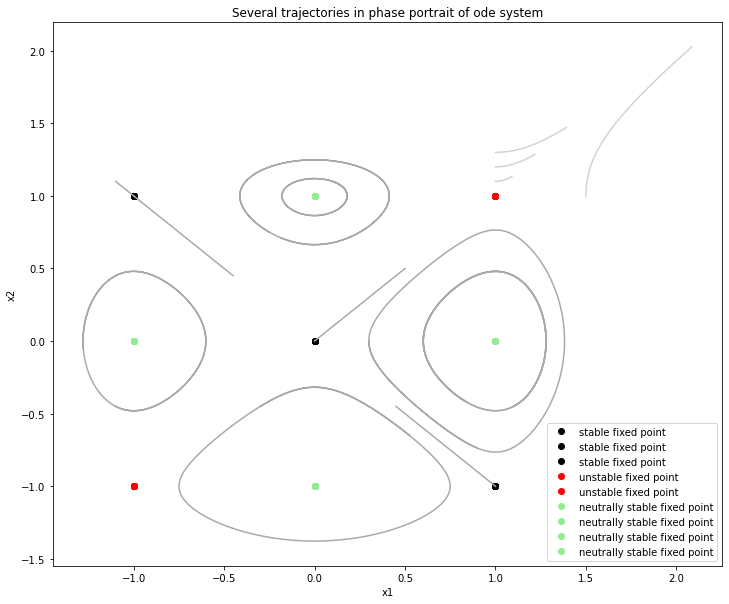

In [ ]:
#Settings
Y0 = np.array([0,1])
x0 = 0
interval_len = 10
stepsize = 0.025
ode_I = lambda x,Y: np.array([-Y[1]+Y[1]**3, -Y[0] + Y[0]**3])
plt.figure(figsize=(12,10))

stablefixedpoints = []
stablefixedpoints.append(np.array([0,0]))
stablefixedpoints.append(np.array([1,-1]))
stablefixedpoints.append(np.array([-1,1]))
[plt.plot(tr.y[0,:],tr.y[1,:],'o', label = 'stable fixed point', color='black') for tr in [integrate.solve_ivp(fun=ode_I, t_span = (x0,interval_len), y0=y0 ,method='RK45', max_step=stepsize) for y0 in stablefixedpoints]]

unstablefixedpoints = []
unstablefixedpoints.append(np.array([-1,-1]))
unstablefixedpoints.append(np.array([1,1]))
[plt.plot(tr.y[0,:],tr.y[1,:],'o', label = 'unstable fixed point', color='red') for tr in [integrate.solve_ivp(fun=ode_I, t_span = (x0,interval_len), y0=y0 ,method='RK45', max_step=stepsize) for y0 in unstablefixedpoints]]

neutralstablefixedpoints = []
neutralstablefixedpoints.append(np.array([0,1]))
neutralstablefixedpoints.append(np.array([1,0]))
neutralstablefixedpoints.append(np.array([-1,0]))
neutralstablefixedpoints.append(np.array([0,-1]))
[plt.plot(tr.y[0,:],tr.y[1,:],'o', label = 'neutrally stable fixed point', color='lightgreen') for tr in [integrate.solve_ivp(fun=ode_I, t_span = (x0,interval_len), y0=y0 ,method='RK45', max_step=stepsize) for y0 in neutralstablefixedpoints]]

nonfixedpoints = []
nonfixedpoints.append(np.array([0.5,0.5]))
nonfixedpoints.append(np.array([-0.25,0.75]))
nonfixedpoints.append(np.array([0.1,1.1]))
nonfixedpoints.append(np.array([0.3,0]))
nonfixedpoints.append(np.array([-0.45,0.45]))
nonfixedpoints.append(np.array([0.45,-0.45]))
nonfixedpoints.append(np.array([1.1,-0.45]))
nonfixedpoints.append(np.array([1.1,-0.45]))
nonfixedpoints.append(np.array([-1.1,-0.45]))
nonfixedpoints.append(np.array([-0.3,-0.45]))
nonfixedpoints.append(np.array([-1.1,1.1]))

[plt.plot(tr.y[0,:],tr.y[1,:], color='darkgray') for tr in [integrate.solve_ivp(fun=ode_I, t_span = (x0,interval_len), y0=y0 ,method='RK45', max_step=stepsize) for y0 in nonfixedpoints]]

runawaypoints = []
runawaypoints.append(np.array([1.5,1]))
runawaypoints.append(np.array([1,1.1]))
runawaypoints.append(np.array([1,1.2]))
runawaypoints.append(np.array([1,1.3]))

interval_len = 0.35
[plt.plot(tr.y[0,:],tr.y[1,:], color='lightgray') for tr in [integrate.solve_ivp(fun=ode_I, t_span = (x0,interval_len), y0=y0 ,method='RK45', max_step=stepsize) for y0 in runawaypoints]]

plt.ylabel('x2')
plt.xlabel('x1')
plt.title('Several trajectories in phase portrait of ode system')
plt.legend(loc='lower right')
plt.show()

We can see several trajectories of points in the system above. There seem to be 9 fixed points in total. The stability of the fixed points is interesting. In general we observe, that if both $x_1>0$ and $x_2>0$ the trajectory goes to infinity. On the $x_2=x_1$ nullcline , we see that any point between 0 and 1 falls towards 0, but if we are on the orthogonal $x_2=-x_1$ nullcline the the points fall towards the fixed points (1,-1) and (-1,1) depending on initial location. This makes it hard to classify the stability of the fixed point (0,0).


### 1.b.1 Analyse the ode system at hand using analytical methods
$$\dot{x_1}=2*x_1*x_2$$ $$\dot{x_2}=\dfrac{1}{4}-x_1^2+x_2^2$$

Analytical: \\
$$\dot{x_1} = 2*x_1 * x_2 $$

We can immediately see that $\dot{x}_1$ can only be 0 if either $\dot{x}_1=0$ or $\dot{x}_2=0$.

$$\dot{x_2} = \frac{1}{4} - x_1^2 + x_2^2 \\
\frac{1}{4} - x_1^2 + x_2^2 = 0 \\
x_1^2  = x_2^2 + \frac{1}{4}  \\
x_1^2  = x_2^2 + \frac{1}{4}  \\
x_1  = \sqrt{x_2^2 + \frac{1}{4}}\\
$$
Given that $\sqrt{x_2^2 + \frac{1}{4}}$ cannot be 0, we have that $x_1$ cannot be zero. However, since $\dot{x_1}$ can only be zero if either $\dot{x}_1=0$ or $\dot{x}_2=0$, we know that $\dot{x}_2=0$.

Thus we have that $x_2=0$ and $x_1=\pm 0.5$

### 1.b.2 Sketch some trajectories of the ode system at hand using numerical methods
$$\dot{x_1}=2*x_1*x_2$$ $$\dot{x_2}=\dfrac{1}{4}-x_1^2+x_2^2$$

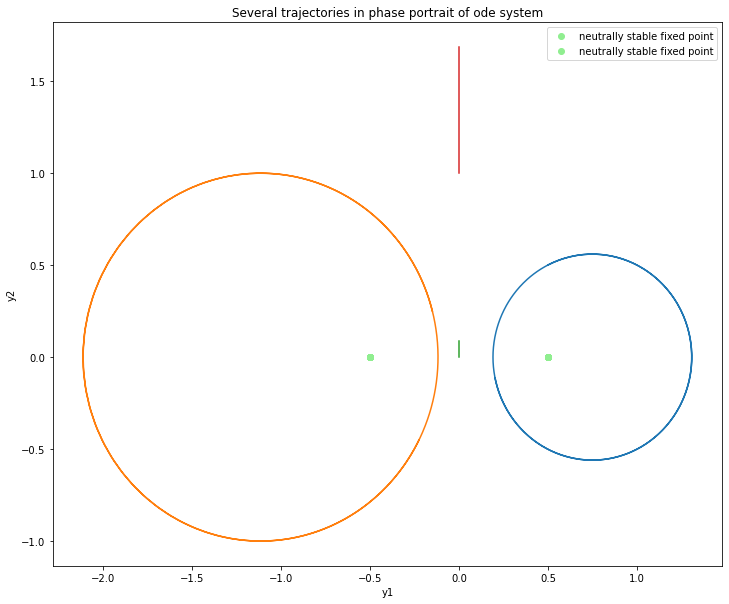

In [ ]:
#Settings
Y0 = np.array([0,1])
x0 = 0
interval_len = 10
stepsize = 0.025
ode_I = lambda x,Y: np.array([2*Y[0]*Y[1], 1/4-Y[0]**2 + Y[1]**2])
plt.figure(figsize=(12,10))

fixedpoints = []
fixedpoints.append(np.array([0.5,0]))
fixedpoints.append(np.array([-0.5,0]))

[plt.plot(tr.y[0,:],tr.y[1,:],'o', label = 'neutrally stable fixed point', color='lightgreen') for tr in [integrate.solve_ivp(fun=ode_I, t_span = (x0,interval_len), y0=y0 ,method='RK45', max_step=stepsize) for y0 in fixedpoints]]

nonfixedpoints = []
nonfixedpoints.append(np.array([0.5,0.5]))
nonfixedpoints.append(np.array([-0.15,0.25]))
[plt.plot(tr.y[0,:],tr.y[1,:]) for tr in [integrate.solve_ivp(fun=ode_I, t_span = (x0,interval_len), y0=y0 ,method='RK45', max_step=stepsize) for y0 in nonfixedpoints]]


runawaypoints = []
runawaypoints.append(np.array([0,0]))
runawaypoints.append(np.array([0,1]))

interval_len = 0.35
[plt.plot(tr.y[0,:],tr.y[1,:]) for tr in [integrate.solve_ivp(fun=ode_I, t_span = (x0,interval_len), y0=y0 ,method='RK45', max_step=stepsize) for y0 in runawaypoints]]

plt.ylabel('y2')
plt.xlabel('y1')
plt.legend(loc='upper right')
plt.title('Several trajectories in phase portrait of ode system')
plt.show()

### 1.c.1 Discuss the number of FPs, their location and their stability as you vary a.
$$\dot{x_1}=x_2+x_1*x_2+a*x_1*x_2^2$$ $$\dot{x_2}=-x_1-x_1^2+x_2^2$$

$$
\dot{x_2}=-x_1-x_1^2+x_2^2 \\
0=-x_1-x_1^2+x_2^2 \\
x_1=x_2^2-x_1^2
$$

$$\dot{x_1}=x_2+x_1*x_2+a*x_1*x_2^2 \\
0=x_2+x_1*x_2+a*x_1*x_2^2\\
-x_2=x_1*x_2+a*x_1*x_2^2\\
-x_2-x_1*x_2=a*x_1*x_2^2\\
\dfrac{-x_2-x_1*x_2}{x_1*x_2^2}=a\\
\dfrac{x_2*(-1-x_1)}{x_1*x_2^2}=a\\
\dfrac{-1-x_1}{x_1*x_2}=a
$$
We can immediately see that if both $x_1=0$ and $x_2=0$ we have a fixed point independently of a.

Fixed points for the case that $a=0$
$$
\dfrac{-1-x_1}{x_1*x_2}=0\\
-1-x_1=0\\
-1=x_1\\
$$
Using this in $x_1=x_2^2-x_2^2$ gives us $x_2=0$ Which tells us that the point (-1,0) must be a fixed point when a=0.

Fixed points for the case that $a=1$
$$
\dfrac{-1-x_1}{x_1*x_2}=1\\
-1-x_1=x_1*x_2\\
-1=x_1*x_2+x_1\\
-1=x_1*(x_2+1)\\
\dfrac{-1}{x_2+1}=x_1
$$
We can see that the point (-1,0) also holds for a=1

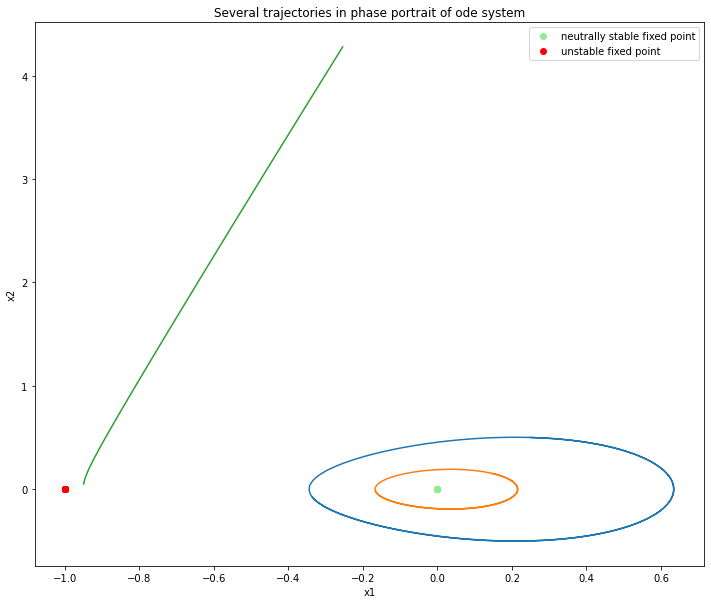

In [ ]:
#Settings
x0 = 0
interval_len = 10
stepsize = 0.0025
ode_I = lambda a,x,Y: np.array([Y[1]+Y[0]*Y[1]+a*Y[0]*Y[1]**2, -Y[0] -Y[0]**2 + Y[1]**2])
a=0
plt.figure(figsize=(12,10))

fixedpoints = []
fixedpoints.append(np.array([0,0]))
# fixedpoints.append(np.array([-0.5,0]))
[plt.plot(tr.y[0,:],tr.y[1,:],'o', label = 'neutrally stable fixed point', color='lightgreen') for tr in [integrate.solve_ivp(fun=lambda x,Y: ode_I(a,x,Y), t_span = (x0,interval_len), y0=y0 ,method='RK45', max_step=stepsize) for y0 in fixedpoints]]

unstablefixedpoints = []
unstablefixedpoints.append(np.array([-1,0]))
[plt.plot(tr.y[0,:],tr.y[1,:],'o', label = 'unstable fixed point', color='red') for tr in [integrate.solve_ivp(fun=lambda x,Y: ode_I(a,x,Y), t_span = (x0,interval_len), y0=y0 ,method='RK45', max_step=stepsize) for y0 in unstablefixedpoints]]

nonfixedpoints = []
nonfixedpoints.append(np.array([0.25,0.5]))
nonfixedpoints.append(np.array([0.15,0.15]))
# nonfixedpoints.append(np.array([-0.15,0.25]))
[plt.plot(tr.y[0,:],tr.y[1,:]) for tr in [integrate.solve_ivp(fun=lambda x,Y: ode_I(a,x,Y), t_span = (x0,interval_len), y0=y0 ,method='RK45', max_step=stepsize) for y0 in nonfixedpoints]]


runawaypoints = []
runawaypoints.append(np.array([-0.95,0.05]))
# runawaypoints.append(np.array([0,1]))

interval_len = 5.35
[plt.plot(tr.y[0,:],tr.y[1,:]) for tr in [integrate.solve_ivp(fun=lambda x,Y: ode_I(a,x,Y), t_span = (x0,interval_len), y0=y0 ,method='RK45', max_step=stepsize) for y0 in runawaypoints]]

plt.ylabel('x2')
plt.xlabel('x1')
plt.legend(loc='upper right')
plt.title('Several trajectories in phase portrait of ode system')
plt.show()

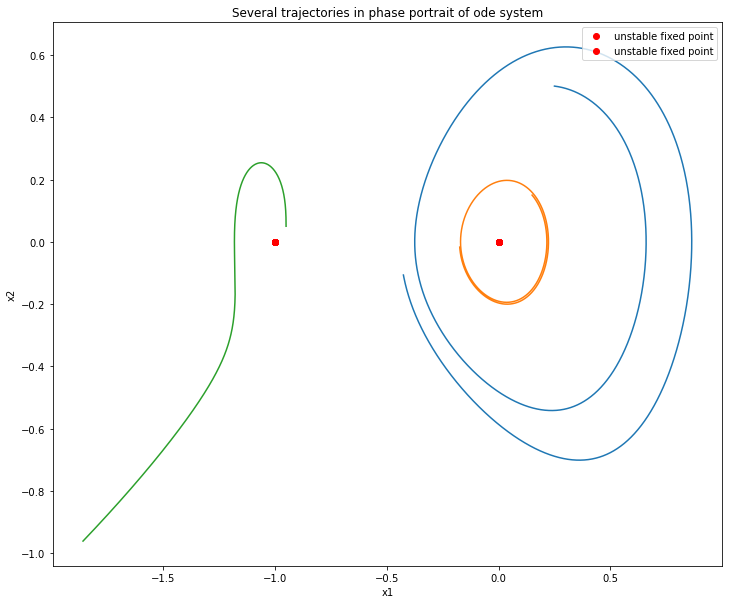

In [ ]:
#Settings
x0 = 0
interval_len = 10
stepsize = 0.0025
ode_I = lambda a,x,Y: np.array([Y[1]+Y[0]*Y[1]+a*Y[0]*Y[1]**2, -Y[0] -Y[0]**2 + Y[1]**2])
a=1
plt.figure(figsize=(12,10))

unstablefixedpoints = []
unstablefixedpoints.append(np.array([0,0]))
unstablefixedpoints.append(np.array([-1,0]))
[plt.plot(tr.y[0,:],tr.y[1,:],'o', label = 'unstable fixed point', color='red') for tr in [integrate.solve_ivp(fun=lambda x,Y: ode_I(a,x,Y), t_span = (x0,interval_len), y0=y0 ,method='RK45', max_step=stepsize) for y0 in unstablefixedpoints]]

nonfixedpoints = []
nonfixedpoints.append(np.array([0.25,0.5]))
nonfixedpoints.append(np.array([0.15,0.15]))
# nonfixedpoints.append(np.array([-0.15,0.25]))
[plt.plot(tr.y[0,:],tr.y[1,:]) for tr in [integrate.solve_ivp(fun=lambda x,Y: ode_I(a,x,Y), t_span = (x0,interval_len), y0=y0 ,method='RK45', max_step=stepsize) for y0 in nonfixedpoints]]


runawaypoints = []
runawaypoints.append(np.array([-0.95,0.05]))
# runawaypoints.append(np.array([0,1]))

interval_len = 10.35
[plt.plot(tr.y[0,:],tr.y[1,:]) for tr in [integrate.solve_ivp(fun=lambda x,Y: ode_I(a,x,Y), t_span = (x0,interval_len), y0=y0 ,method='RK45', max_step=stepsize) for y0 in runawaypoints]]

plt.ylabel('x2')
plt.xlabel('x1')
plt.legend(loc='upper right')
plt.title('Several trajectories in phase portrait of ode system')
plt.show()

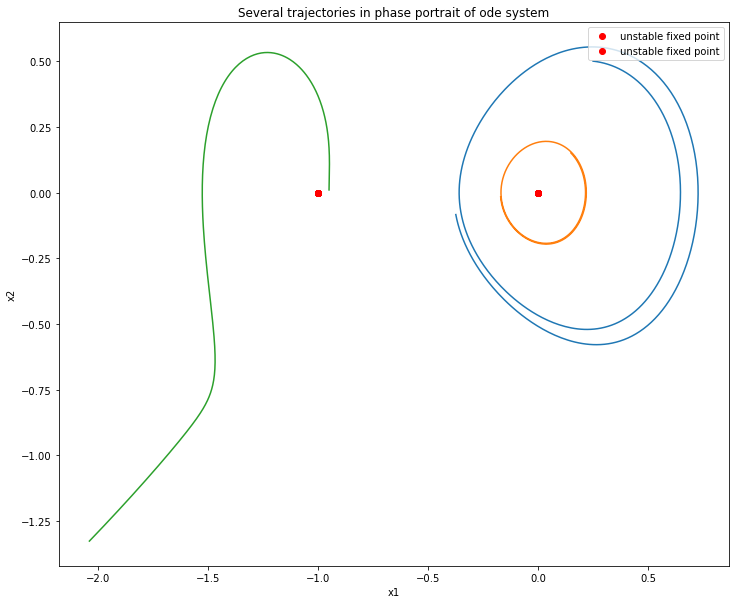

In [ ]:
#Settings
x0 = 0
interval_len = 10
stepsize = 0.025
ode_I = lambda a,x,Y: np.array([Y[1]+Y[0]*Y[1]+a*Y[0]*Y[1]**2, -Y[0] -Y[0]**2 + Y[1]**2])
a=0.5
plt.figure(figsize=(12,10))

unstablefixedpoints = []
unstablefixedpoints.append(np.array([0,0]))
unstablefixedpoints.append(np.array([-1,0]))
[plt.plot(tr.y[0,:],tr.y[1,:],'o', label = 'unstable fixed point', color='red') for tr in [integrate.solve_ivp(fun=lambda x,Y: ode_I(a,x,Y), t_span = (x0,interval_len), y0=y0 ,method='RK45', max_step=stepsize) for y0 in unstablefixedpoints]]

nonfixedpoints = []
nonfixedpoints.append(np.array([0.25,0.5]))
nonfixedpoints.append(np.array([0.15,0.15]))
# nonfixedpoints.append(np.array([-0.15,0.25]))
[plt.plot(tr.y[0,:],tr.y[1,:]) for tr in [integrate.solve_ivp(fun=lambda x,Y: ode_I(a,x,Y), t_span = (x0,interval_len), y0=y0 ,method='RK45', max_step=stepsize) for y0 in nonfixedpoints]]


runawaypoints = []
runawaypoints.append(np.array([-0.95,0.01]))
# runawaypoints.append(np.array([0,1]))

interval_len = 12.35
[plt.plot(tr.y[0,:],tr.y[1,:]) for tr in [integrate.solve_ivp(fun=lambda x,Y: ode_I(a,x,Y), t_span = (x0,interval_len), y0=y0 ,method='RK45', max_step=stepsize) for y0 in runawaypoints]]

plt.ylabel('x2')
plt.xlabel('x1')
plt.legend(loc='upper right')
plt.title('Several trajectories in phase portrait of ode system')
plt.show()

As we can see here, the fixed points interestingly also hold for decimal values of a, such as .

## Exercise 2
### 2.a The van der pol oscillator is given by $y''+C(y^2-1)y'+\omega^2y=0$. Show using phase plane analysis that there is a limit cycle.

We are given $y''=-C(y^2-1)y'-\omega^2y$

We take $u=y$ and $v=y'$ and their derivatives $u'=y'$ and $v'=y''$

Now we have that $u'=v$ and $v'=-C(u^2-1)v-\omega^2u$

Now we change the formular names to the ones used in the assignment and we have the desired odes: $y_1'=y_2$ and $y_2'=-C(y_1^2-1)y_2-\omega^2y_1$

$0=-C(y_1^2-1)y_2-\omega^2y_1 $

$\dfrac{-\omega^2 * y_1}{-C*(y_1 ^2 - 1)} = y_2$

Thus for $C=1$ and $\omega =1$ we have the following graph:


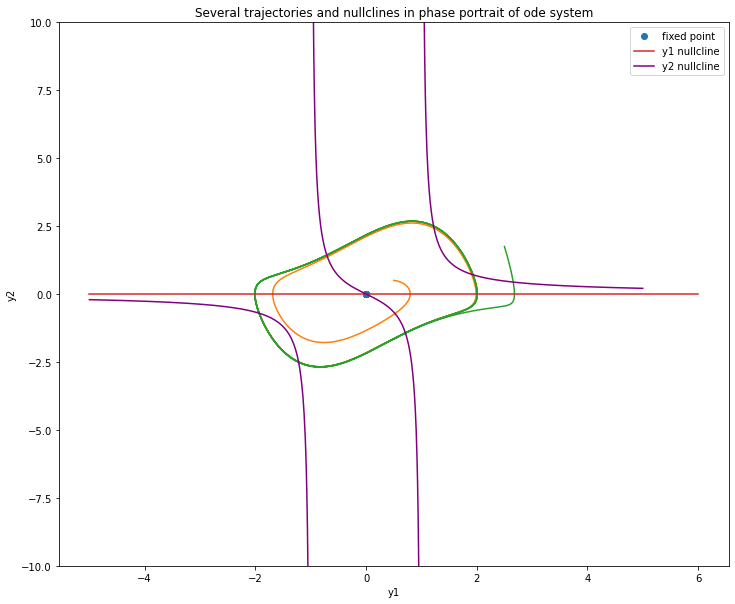

In [ ]:
#Settings
x0 = 0
interval_len = 20
stepsize = 0.025
C = 1
om = 1
ode_I = lambda x,Y: np.array([Y[1], -C*(Y[0]**2-1)*Y[1] - om**2*Y[0]])
plt.figure(figsize=(12,10))

fixedpoints = []
fixedpoints.append(np.array([0,0]))

[plt.plot(tr.y[0,:],tr.y[1,:],'o', label = 'fixed point') for tr in [integrate.solve_ivp(fun=ode_I, t_span = (x0,interval_len), y0=y0 ,method='RK45', max_step=stepsize) for y0 in fixedpoints]]

nonfixedpoints = []
nonfixedpoints.append(np.array([0.5,0.5]))
nonfixedpoints.append(np.array([2.5,1.75]))
[plt.plot(tr.y[0,:],tr.y[1,:]) for tr in [integrate.solve_ivp(fun=ode_I, t_span = (x0,interval_len), y0=y0 ,method='RK45', max_step=stepsize) for y0 in nonfixedpoints]]

runawaypoints = []
interval_len = 0.35
[plt.plot(tr.y[0,:],tr.y[1,:]) for tr in [integrate.solve_ivp(fun=ode_I, t_span = (x0,interval_len), y0=y0 ,method='RK45', max_step=stepsize) for y0 in runawaypoints]]

y1nullcline = np.zeros((12))
plt.plot(np.arange(-5,7),y1nullcline, label = 'y1 nullcline')

def y2cline(y1):
  return (y1/(y1**2-1))

xspace = np.linspace(-5,-1.01,400)
y2=y2cline(xspace)
plt.plot(xspace, y2, label='y2 nullcline', color='purple')

xspace = np.linspace(-0.99,0.99,400)
y2=y2cline(xspace)
plt.plot(xspace, y2, color='purple')

xspace = np.linspace(1.01,5,400)
y2=y2cline(xspace)
plt.plot(xspace, y2, color='purple')

plt.ylim(-10,10)
plt.ylabel('y2')
plt.xlabel('y1')
plt.title('Several trajectories and nullclines in phase portrait of ode system')
plt.legend(loc='upper right')
plt.show()


By altering $w$ and $c$ we only multiply our $(y_1/(y_1^2-1))$ term with a different constant, this will not alter the assymptotic behaviour of the function, or the zero crossing. Thus the observed behaviour for the $y_2$ nullcline will not be altered by changing either $c$ or $w$.
By altering $w$ and $c$ we only multiply our $(y_1/(y_1^2-1))$ term with a different constant, this will not alter the assymptotic behaviour of the function nor will this alter the zero crossing. Thus the observed behaviour for the $y_2$ nullcline will not be altered by chaning either $c$ or $w$.

### 2.b.1 
Both $C$ and $\omega$ influences the amplitude of $y_2$ but not of $y_1$. In terms of the original formula this means, we increase the amplitude of y, but not y'.


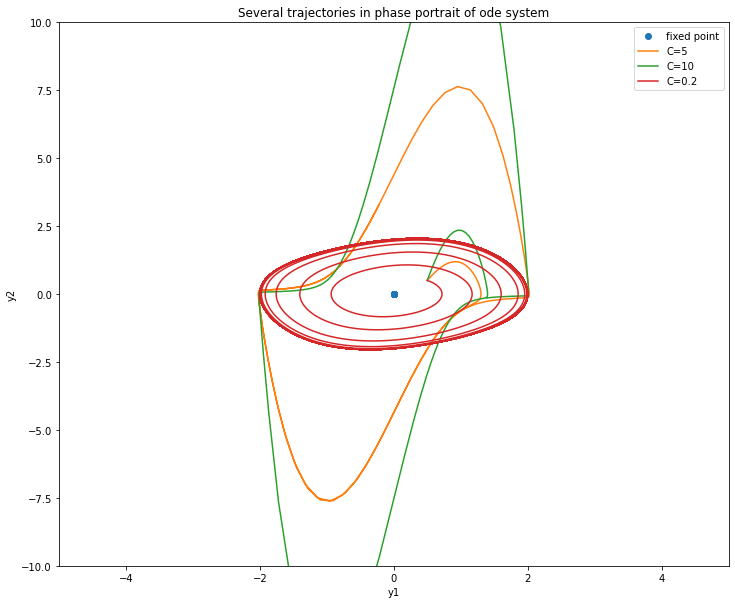

In [ ]:
#Settings
x0 = 0
interval_len = 20
stepsize = 0.025
ode_I = lambda C,om,x,Y: np.array([Y[1], -C*(Y[0]**2-1)*Y[1] - om**2*Y[0]])
plt.figure(figsize=(12,10))

fixedpoints = []
fixedpoints.append(np.array([0,0]))

C = 1
om = 1
[plt.plot(tr.y[0,:],tr.y[1,:],'o', label = 'fixed point') for tr in [integrate.solve_ivp(fun=lambda x,Y: ode_I(C,om,x,Y), t_span = (x0,interval_len), y0=y0 ,method='RK45', max_step=stepsize) for y0 in fixedpoints]]

nonfixedpoints = []
nonfixedpoints.append(np.array([0.5,0.5]))

C = 5
om = 1
[plt.plot(tr.y[0,:],tr.y[1,:], label='C=5') for tr in [integrate.solve_ivp(fun=lambda x,Y: ode_I(C,om,x,Y), t_span = (x0,interval_len), y0=y0 ,method='RK45', max_step=stepsize) for y0 in nonfixedpoints]]

C = 10
om = 1
[plt.plot(tr.y[0,:],tr.y[1,:], label='C=10') for tr in [integrate.solve_ivp(fun=lambda x,Y: ode_I(C,om,x,Y), t_span = (x0,interval_len), y0=y0 ,method='RK45', max_step=stepsize) for y0 in nonfixedpoints]]

C = 0.2
om = 1
interval_len = 200
[plt.plot(tr.y[0,:],tr.y[1,:], label='C=0.2') for tr in [integrate.solve_ivp(fun=lambda x,Y: ode_I(C,om,x,Y), t_span = (x0,interval_len), y0=y0 ,method='RK45', max_step=stepsize) for y0 in nonfixedpoints]]

plt.ylim(-10,10)
plt.xlim(-5,5)
plt.ylabel('y2')
plt.xlabel('y1')
plt.title('Several trajectories in phase portrait of ode system')
plt.legend(loc='upper right')
plt.show()

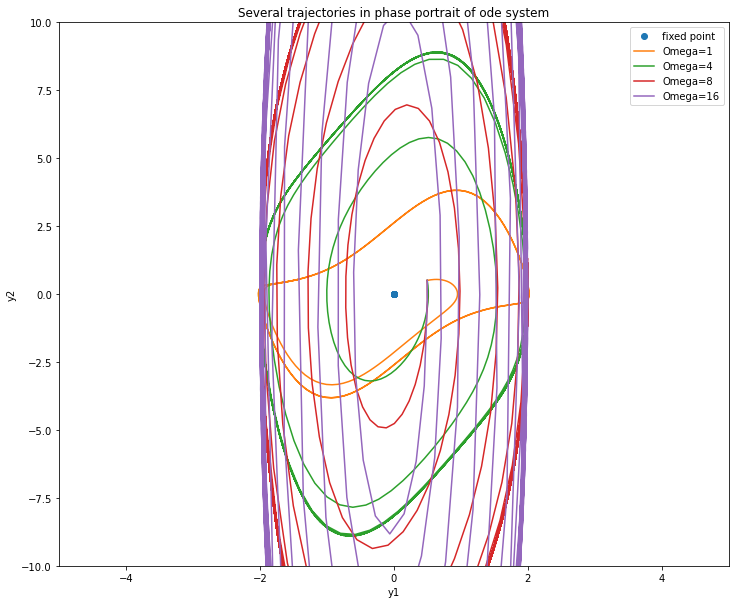

In [ ]:
#Settings
x0 = 0
interval_len = 20
stepsize = 0.025
ode_I = lambda C,om,x,Y: np.array([Y[1], -C*(Y[0]**2-1)*Y[1] - om**2*Y[0]])
plt.figure(figsize=(12,10))

fixedpoints = []
fixedpoints.append(np.array([0,0]))

C = 1
om = 1
[plt.plot(tr.y[0,:],tr.y[1,:],'o', label = 'fixed point') for tr in [integrate.solve_ivp(fun=lambda x,Y: ode_I(C,om,x,Y), t_span = (x0,interval_len), y0=y0 ,method='RK45', max_step=stepsize) for y0 in fixedpoints]]

nonfixedpoints = []
nonfixedpoints.append(np.array([0.5,0.5]))

C = 2
om = 1
[plt.plot(tr.y[0,:],tr.y[1,:], label='Omega=1') for tr in [integrate.solve_ivp(fun=lambda x,Y: ode_I(C,om,x,Y), t_span = (x0,interval_len), y0=y0 ,method='RK45', max_step=stepsize) for y0 in nonfixedpoints]]

C = 2
om = 4
[plt.plot(tr.y[0,:],tr.y[1,:], label='Omega=4') for tr in [integrate.solve_ivp(fun=lambda x,Y: ode_I(C,om,x,Y), t_span = (x0,interval_len), y0=y0 ,method='RK45', max_step=stepsize) for y0 in nonfixedpoints]]

C = 2
om = 8
interval_len = 200
[plt.plot(tr.y[0,:],tr.y[1,:], label='Omega=8') for tr in [integrate.solve_ivp(fun=lambda x,Y: ode_I(C,om,x,Y), t_span = (x0,interval_len), y0=y0 ,method='RK45', max_step=stepsize) for y0 in nonfixedpoints]]

C = 2
om = 16
interval_len = 20
[plt.plot(tr.y[0,:],tr.y[1,:], label='Omega=16') for tr in [integrate.solve_ivp(fun=lambda x,Y: ode_I(C,om,x,Y), t_span = (x0,interval_len), y0=y0 ,method='RK45', max_step=stepsize) for y0 in nonfixedpoints]]


plt.ylim(-10,10)
plt.xlim(-5,5)
plt.ylabel('y2')
plt.xlabel('y1')
plt.title('Several trajectories in phase portrait of ode system')
plt.legend(loc='upper right')
plt.show()

### 2.b.2 
The higher the value of C is, the lower the frequency (antiproportional $\alpha = C^{-1}$). The higher $\omega$ is, the higher frequency (proportional). As can be seen in the graph below.


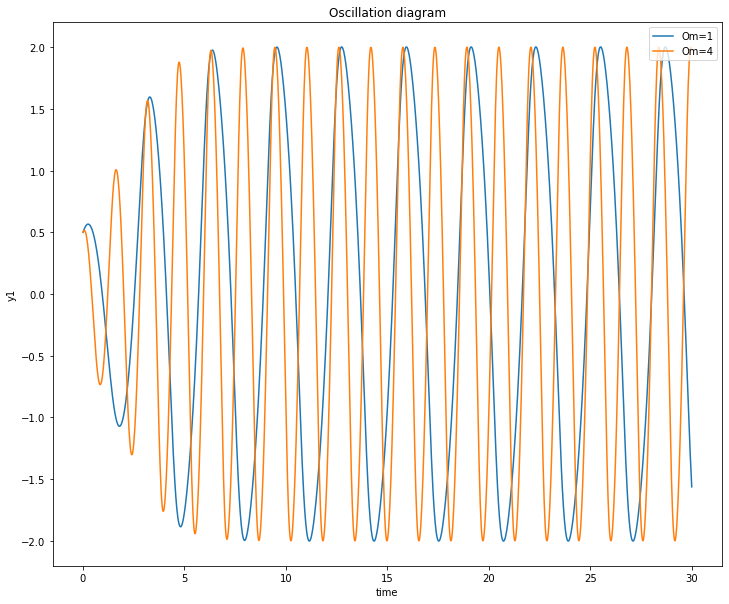

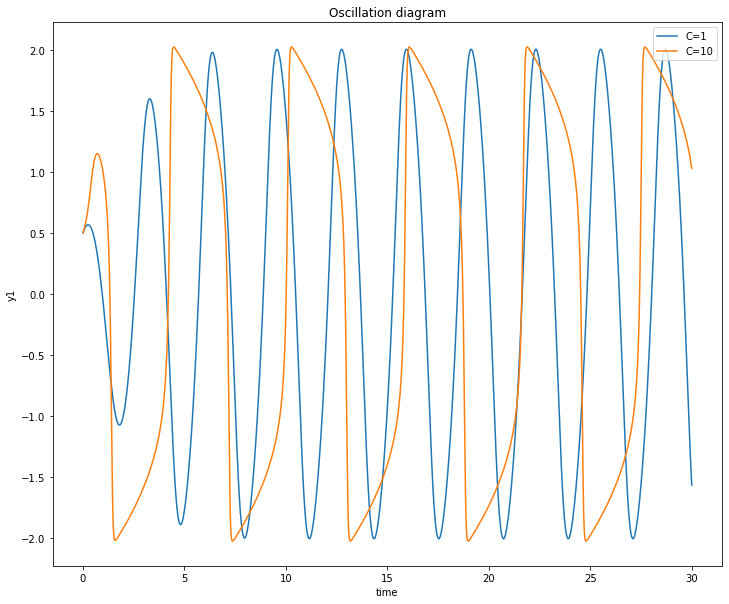

In [ ]:
#Settings
x0 = 0
interval_len = 30
stepsize = 0.025
ode_I = lambda C,om,x,Y: np.array([Y[1], -C*(Y[0]**2-1)*Y[1] - om**2*Y[0]])
plt.figure(figsize=(12,10))

nonfixedpoints = []
nonfixedpoints.append(np.array([0.5,0.5]))

C = 1
om = 2
[plt.plot(tr.t,tr.y[0,:], label='Om=1') for tr in [integrate.solve_ivp(fun=lambda x,Y: ode_I(C,om,x,Y), t_span = (x0,interval_len), y0=y0 ,method='RK45', max_step=stepsize) for y0 in nonfixedpoints]]

C = 1
om = 4
[plt.plot(tr.t,tr.y[0,:], label='Om=4') for tr in [integrate.solve_ivp(fun=lambda x,Y: ode_I(C,om,x,Y), t_span = (x0,interval_len), y0=y0 ,method='RK45', max_step=stepsize) for y0 in nonfixedpoints]]

# plt.ylim(-10,10)
# plt.xlim(-5,5)
plt.ylabel('y1')
plt.xlabel('time')
plt.title('Oscillation diagram')
plt.legend(loc='upper right')
# plt.gca().grid(which='major', color='gray', linestyle='-', linewidth=1)
plt.show()

plt.figure(figsize=(12,10))

C = 1
om = 2
[plt.plot(tr.t,tr.y[0,:], label='C=1') for tr in [integrate.solve_ivp(fun=lambda x,Y: ode_I(C,om,x,Y), t_span = (x0,interval_len), y0=y0 ,method='RK45', max_step=stepsize) for y0 in nonfixedpoints]]

C = 10
om = 2
[plt.plot(tr.t,tr.y[0,:], label='C=10') for tr in [integrate.solve_ivp(fun=lambda x,Y: ode_I(C,om,x,Y), t_span = (x0,interval_len), y0=y0 ,method='RK45', max_step=stepsize) for y0 in nonfixedpoints]]

# plt.ylim(-10,10)
# plt.xlim(-5,5)
plt.ylabel('y1')
plt.xlabel('time')
plt.title('Oscillation diagram')
plt.legend(loc='upper right')
# plt.gca().grid(which='major', color='gray', linestyle='-', linewidth=1)
plt.show()

### 2.b.3 
The speed of the convergence towards the stable limit cycle is independent from $\omega$ as can be seen in the graph below.

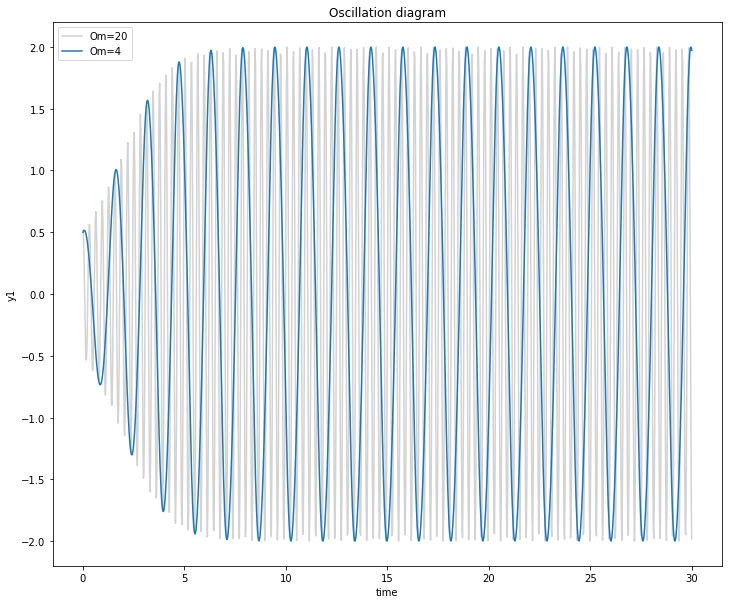

In [ ]:
#Settings
x0 = 0
interval_len = 30
stepsize = 0.025
ode_I = lambda C,om,x,Y: np.array([Y[1], -C*(Y[0]**2-1)*Y[1] - om**2*Y[0]])
plt.figure(figsize=(12,10))

nonfixedpoints = []
nonfixedpoints.append(np.array([0.5,0.5]))

C = 1
om = 20
[plt.plot(tr.t,tr.y[0,:], label='Om=20', c='lightgray') for tr in [integrate.solve_ivp(fun=lambda x,Y: ode_I(C,om,x,Y), t_span = (x0,interval_len), y0=y0 ,method='RK45', max_step=stepsize) for y0 in nonfixedpoints]]

C = 1
om = 4
[plt.plot(tr.t,tr.y[0,:], label='Om=4') for tr in [integrate.solve_ivp(fun=lambda x,Y: ode_I(C,om,x,Y), t_span = (x0,interval_len), y0=y0 ,method='RK45', max_step=stepsize) for y0 in nonfixedpoints]]


# plt.ylim(-10,10)
# plt.xlim(-5,5)
plt.ylabel('y1')
plt.xlabel('time')
plt.title('Oscillation diagram')
plt.legend(loc='upper left')
# plt.gca().grid(which='major', color='gray', linestyle='-', linewidth=1)
plt.show()


The speed of the convergence towards the stable limit cycle is dependent on C, as can be seen in the graph below

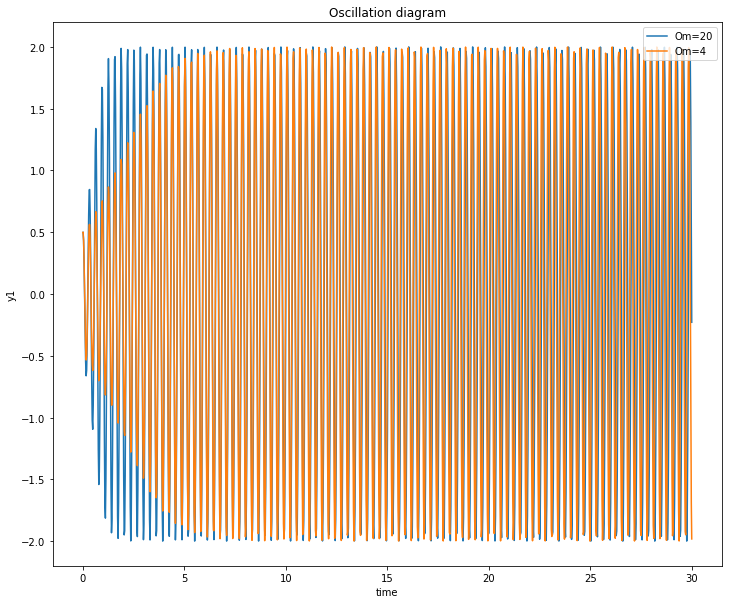

In [ ]:
#Settings
x0 = 0
interval_len = 30
stepsize = 0.025
ode_I = lambda C,om,x,Y: np.array([Y[1], -C*(Y[0]**2-1)*Y[1] - om**2*Y[0]])
plt.figure(figsize=(12,10))

nonfixedpoints = []
nonfixedpoints.append(np.array([0.5,0.5]))

C = 4
om = 20
[plt.plot(tr.t,tr.y[0,:], label='Om=20') for tr in [integrate.solve_ivp(fun=lambda x,Y: ode_I(C,om,x,Y), t_span = (x0,interval_len), y0=y0 ,method='RK45', max_step=stepsize) for y0 in nonfixedpoints]]

C = 1
om = 20
[plt.plot(tr.t,tr.y[0,:], label='Om=4') for tr in [integrate.solve_ivp(fun=lambda x,Y: ode_I(C,om,x,Y), t_span = (x0,interval_len), y0=y0 ,method='RK45', max_step=stepsize) for y0 in nonfixedpoints]]


# plt.ylim(-10,10)
# plt.xlim(-5,5)
plt.ylabel('y1')
plt.xlabel('time')
plt.title('Oscillation diagram')
plt.legend(loc='upper right')
# plt.gca().grid(which='major', color='gray', linestyle='-', linewidth=1)
plt.show()


## Exercise 3 Hopf bifurcations

We start off with the left two equations, note that we can ignore the $\theta$ evolution for the sake of this exercise, as it is a constant anyways and we are on a limit cycle with radius r and rotational speed (angle/sec) of $\dot \theta$. 

$\dot r=r(c-r^2) \Rightarrow r(c-r^2)=0$ for the nullcline. 
We have two fixed points: $r=0; r= \sqrt{c}$. The second of these is only real for $c\geq0$.

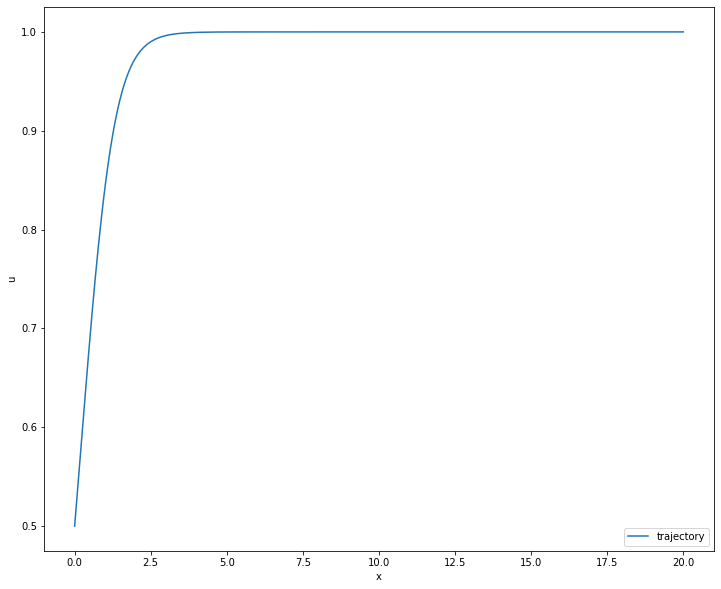

In [ ]:
plt.figure(figsize=(12,10))
Y0 = np.array([0.5])
stepsize = 0.025
x0 = 0
interval_len = 20
ode_I = lambda c,t,Y: np.array([Y[0]*(c-Y[0]**2)])

c=1
result = integrate.solve_ivp(fun=lambda x,Y: ode_I(c,x,Y), t_span = (x0,interval_len), y0=Y0, method='RK45', max_step=stepsize)
plt.plot(result.t, result.y[0,:], label="trajectory")
plt.ylabel('u')
plt.xlabel('x')
plt.legend(loc='lower right')
plt.show()
# print(result)

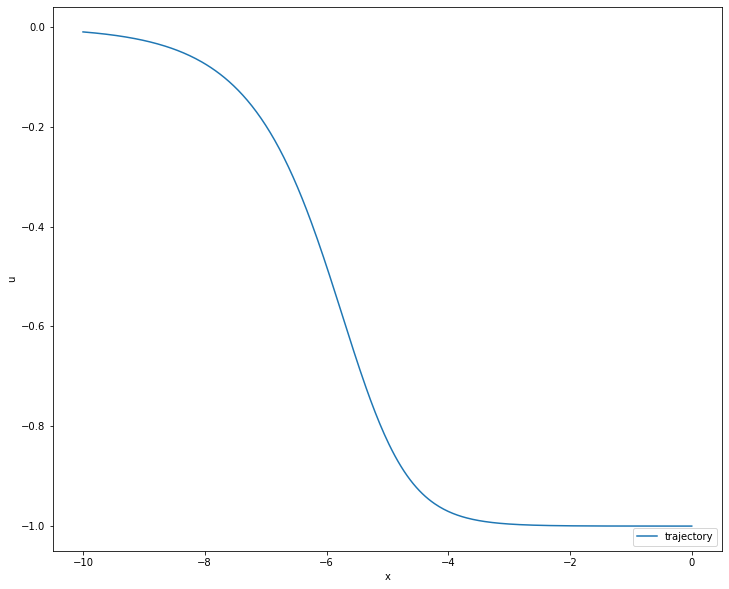

In [ ]:
plt.figure(figsize=(12,10))
Y0 = np.array([-0.01])
stepsize = 0.025
x0 = -10
interval_len = 0
ode_I = lambda c,t,Y: np.array([Y[0]*(c-Y[0]**2)])

c=1
result = integrate.solve_ivp(fun=lambda x,Y: ode_I(c,x,Y), t_span = (x0,interval_len), y0=Y0, method='RK45', max_step=stepsize)
plt.plot(result.t, result.y[0,:], label="trajectory")
plt.ylabel('u')
plt.xlabel('x')
plt.legend(loc='lower right')
plt.show()
# print(result)

/Users/arnediehl/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The number of calls to function has reached maxfev = 400.
  warnings.warn(msg, RuntimeWarning)


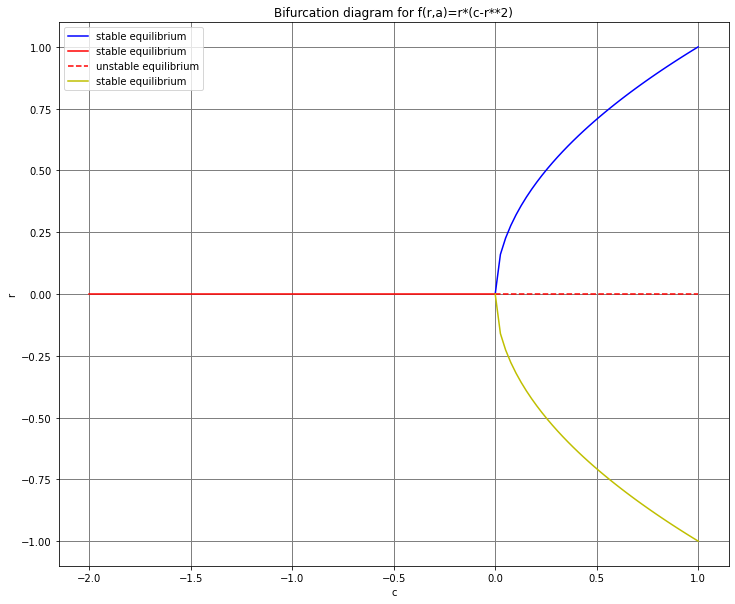

In [ ]:
plt.figure(figsize=(12,10))
func=lambda r,c:r*(c-r**2)

cspace1 = np.linspace(0,1,40)
cspace2 = np.linspace(-2,0,40)

xtol = 0.001
roots1 = np.array([optimize.fsolve(func=func, x0=1.01, xtol=xtol,  args=c) for c in cspace1]).flatten()
roots2 = np.array([optimize.fsolve(func=func, x0=0.01, xtol=xtol, args=c) for c in cspace2]).flatten()
roots3 = np.array([optimize.fsolve(func=func, x0=0.01, xtol=xtol, args=c) for c in cspace1]).flatten()
roots4 = np.array([optimize.fsolve(func=func, x0=-1., xtol=xtol, args=c) for c in cspace1]).flatten()

plt.plot(cspace1,roots1, '-', c="b", label = 'stable equilibrium')
plt.plot(cspace2,roots2, '-', c="r", label = 'stable equilibrium')
plt.plot(cspace1,roots3, '--', c="r", label = 'unstable equilibrium')
plt.plot(cspace1,roots4, '-', c="y", label = 'stable equilibrium')

plt.title('Bifurcation diagram for f(r,a)=r*(c-r**2)')
plt.ylabel('r')
plt.xlabel('c')
plt.gca().grid(which='major', color='gray', linestyle='-', linewidth=1)
plt.legend(loc='upper left')
plt.show()

For the second equation we have: $\dot r=r(c+2r^2-r^4) \Rightarrow r(c+2r^2-r^4)=0$.

Thus we have fixed points given by: $r=0; r= \pm\sqrt{1\pm(\sqrt{4+4c}/2)}$, where the inner part follows from using the ABC-formula and using $q=r^2$ as the variable and the outer square root from resubstituting $r^2$ for $q$. This gives us a set of 5 fixed points, one for $r=0$ and 4 for the different combinations of + and - in the $r= \pm\sqrt{1\pm(\sqrt{4+4c}/2)}$. Note that the different combinations will only be valid on different ranges of c.


/Users/arnediehl/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The number of calls to function has reached maxfev = 400.
  warnings.warn(msg, RuntimeWarning)


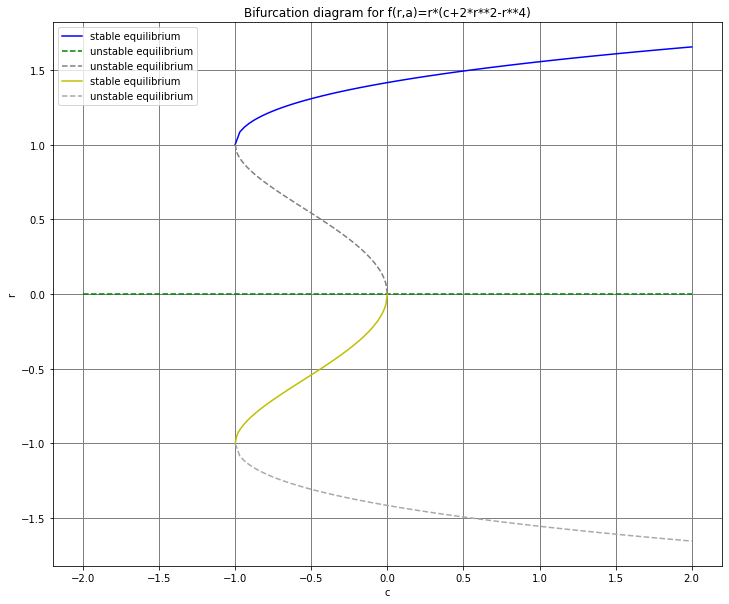

In [ ]:
plt.figure(figsize=(12,10))
func=lambda r,c:r*(c+2*r**2-r**4)

cspace = np.linspace(-1,2,100)
cspace2 = np.linspace(-1,0,100)
cspace3 = np.linspace(-2,2,100)


xtol = 0.001
roots1 = np.array([optimize.fsolve(func=func, x0=2.01, xtol=xtol,  args=c) for c in cspace]).flatten()
roots3 = np.array([optimize.fsolve(func=func, x0=1, xtol=xtol, args=c) for c in cspace3]).flatten()
roots4 = np.array([optimize.fsolve(func=func, x0=0.9, xtol=xtol, args=c) for c in cspace2]).flatten()
roots5 = np.array([optimize.fsolve(func=func, x0=-0.9, xtol=xtol, args=c) for c in cspace2]).flatten()
roots6 = np.array([optimize.fsolve(func=func, x0=-2., xtol=xtol, args=c) for c in cspace]).flatten()

plt.plot(cspace,roots1, '-', c="b", label = 'stable equilibrium')
plt.plot(cspace3,roots3, '--', c="g", label = 'unstable equilibrium')
plt.plot(cspace2,roots4, '--', c="gray", label = 'unstable equilibrium')
plt.plot(cspace2,roots5, '-', c="y", label = 'stable equilibrium')
plt.plot(cspace,roots6, '--', c="darkgray", label = 'unstable equilibrium')

plt.title('Bifurcation diagram for f(r,a)=r*(c+2*r**2-r**4)')
plt.ylabel('r')
plt.xlabel('c')
plt.legend(loc='upper left')
plt.gca().grid(which='major', color='gray', linestyle='-', linewidth=1)
plt.show()

In the graph above we can see all fixed points from $c=-2$ to $c=2$. Since we have no stable fixed points for $c<-1$, we assume that this is the "dangerous" switch in dynamics that asked for in the question.

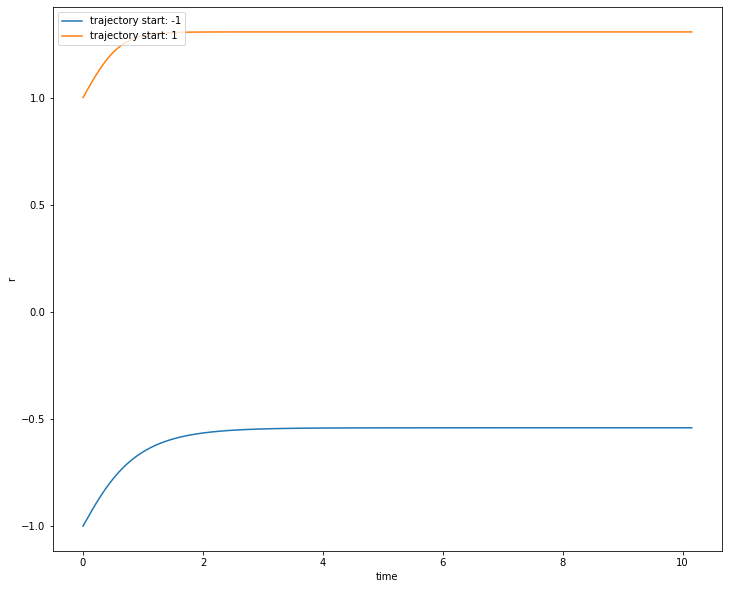

In [ ]:
plt.figure(figsize=(12,10))
Y0 = np.array([-1])
stepsize = 0.025
x0 = 0
interval_len = 10.15
ode_I = lambda c,t,Y: np.array([c+2*Y[0]**2-Y[0]**4])

c=-0.5
result = integrate.solve_ivp(fun=lambda x,Y: ode_I(c,x,Y), t_span = (x0,interval_len), y0=Y0, method='RK45', max_step=stepsize)
plt.plot(result.t, result.y[0,:], label="trajectory start: {}".format(Y0[0]))

Y0 = np.array([1])
result = integrate.solve_ivp(fun=lambda x,Y: ode_I(c,x,Y), t_span = (x0,interval_len), y0=Y0, method='RK45', max_step=stepsize)
plt.plot(result.t, result.y[0,:], label="trajectory start: {}".format(Y0[0]))

plt.ylabel('r')
plt.xlabel('time')
plt.legend(loc='lower right')
plt.legend(loc='upper left')
plt.show()
# print(result)

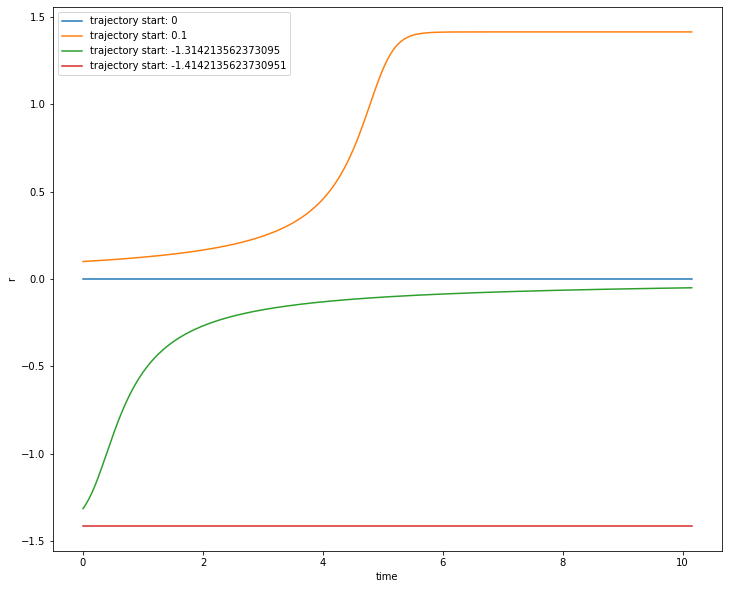

In [ ]:
plt.figure(figsize=(12,10))
Y0 = np.array([0])
stepsize = 0.025
x0 = 0
interval_len = 10.15
ode_I = lambda c,t,Y: np.array([c+2*Y[0]**2-Y[0]**4])

c=0
result = integrate.solve_ivp(fun=lambda x,Y: ode_I(c,x,Y), t_span = (x0,interval_len), y0=Y0, method='RK45', max_step=stepsize)
plt.plot(result.t, result.y[0,:], label="trajectory start: {}".format(Y0[0]))

Y0 = np.array([0.1])
result = integrate.solve_ivp(fun=lambda x,Y: ode_I(c,x,Y), t_span = (x0,interval_len), y0=Y0, method='RK45', max_step=stepsize)
plt.plot(result.t, result.y[0,:], label="trajectory start: {}".format(Y0[0]))

Y0 = np.array([-np.sqrt(2)+0.1])
result = integrate.solve_ivp(fun=lambda x,Y: ode_I(c,x,Y), t_span = (x0,interval_len), y0=Y0, method='RK45', max_step=stepsize)
plt.plot(result.t, result.y[0,:], label="trajectory start: {}".format(Y0[0]))

Y0 = np.array([-np.sqrt(2)])
result = integrate.solve_ivp(fun=lambda x,Y: ode_I(c,x,Y), t_span = (x0,interval_len), y0=Y0, method='RK45', max_step=stepsize)
plt.plot(result.t, result.y[0,:], label="trajectory start: {}".format(Y0[0]))

plt.ylabel('r')
plt.xlabel('time')
plt.legend(loc='lower right')
plt.legend(loc='upper left')
plt.show()
# print(result)